# Problem 1
Price a one-year maturity T = 1, strike = 100 European call option with current asset price $S_0$ = 100 and volatility $\sigma$ = 20\%:

Assume the continuously compounded interest rate r = 6\% per annum.

Assume that $dS(t) = rS(t)dt + σS(t)dW(t)$.

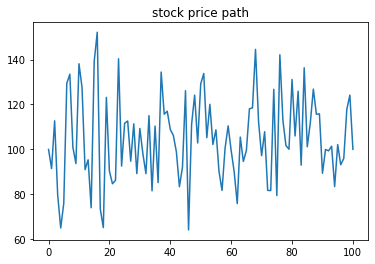

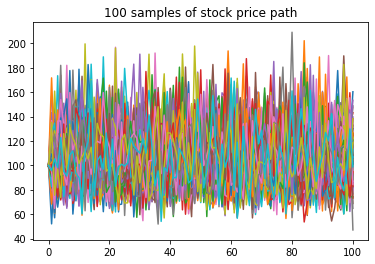

In [103]:
## A ##
# Monte carlo simulation to simulate the path of S(t)

from random import gauss
import numpy as np
import matplotlib.pyplot as plt

def generate_asset_price(in_price, vol, rate, T):
    return in_price * np.exp((rate - 0.5 * vol**2) * T + vol * np.sqrt(T) * gauss(0,1.0))

in_price = 100.0 # current asset price
vol = 0.2 # volatility of 20%
rate = 0.06 # rate of 6%
T = 1 # maturity
K = 100.0
simulations = 100

def generate_path():
    stock = [in_price]
    for i in range(simulations):
        stk = generate_asset_price(in_price, vol, rate, T)
        stock.append(stk)
    return stock

# plot 1  paths
plt.figure()
plt.title('stock price path')
stock = generate_path()
plt.plot(stock)
plt.show()

# plot 100 paths
paths = 100
plt.figure()
plt.title('100 samples of stock price path')
for k in range(paths):
    stock = generate_path()
    plt.plot(stock)
plt.show()


In [104]:
## B ##
# Monte carlo simulate to find the Eurpean option price 

from random import gauss
import numpy as np
from scipy.stats import norm

def generate_asset_price(in_price, vol, rate, T):
    return in_price * np.exp((rate - 0.5 * vol**2) * T + vol * np.sqrt(T) * gauss(0,1.0))

def call_payoff(S_T, K):
    return max(0.0, S_T - K)

in_price = 100.0 # current asset price
vol = 0.2 # volatility of 20%
rate = 0.06 # rate of 6%
T = 1 # maturity
K = 100.0
simulations = 10000

    
payoffs = []
discount_factor = np.exp(-rate * T)

for i in range(simulations):
    S_T = generate_asset_price(in_price, vol, rate, T)
    payoffs.append( discount_factor * call_payoff(S_T, K) )

price = np.mean(payoffs) 
std_dev = np.sqrt( ( 1/(simulations-1) ) * np.sum(np.square(np.subtract(payoffs, price))) )
std_error = std_dev / np.sqrt(simulations)
    
print('Asset price:', price)

print('confidence interval is: (', (price - std_error*1.96),',',(price + std_error*1.96), ')')

# Black-Scholes formula to find the Eurpean option price 

d1 = ( np.log(in_price/K) + (rate + (0.5 * vol**2))*T ) / ( vol * np.sqrt(T) )
d2 = d1 - ( vol * np.sqrt(T) )

option = ( norm.cdf(d1) * in_price ) - ( norm.cdf(d2) * K * discount_factor )
print('Black-Scholes option:', option)

Asset price: 10.9025025033527
confidence interval is: ( 10.608007371005542 , 11.196997635699859 )
Black-Scholes option: 10.98954915262599


In [105]:
## C ##
# Monte carlo simulation to find the Delta of the European option

from random import gauss
import numpy as np
from scipy.stats import norm

def generate_asset_price(in_price, vol, rate, T):
    return in_price * np.exp((rate - 0.5 * vol**2) * T + vol * np.sqrt(T) * gauss(0,1.0))

def call_payoff(S_T, K):
    return max(0.0, S_T - K)

in_price = 100.0 # current asset price
vol = 0.2 # volatility of 20%
rate = 0.06 # rate of 6%
T = 1 # maturity
h = 7 # step size (optimal)
K = 100.0
simulations = 10000
    
payoffs = []
N_payoffs = []
discount_factor = np.exp(-rate * T)

for i in range(simulations):
    S_T = generate_asset_price(in_price, vol, rate, T)
    payoffs.append( call_payoff(S_T, K) )
    N_payoffs.append( call_payoff(S_T + h, K) )
    
price1 = np.mean(payoffs) 
price2 = np.mean(N_payoffs)

Delta = discount_factor * ( (price2 - price1) / h )

std_dev1 = np.sqrt( ( 1/(simulations-1) ) * np.sum(np.square(np.subtract(payoffs, price1))) )
std_dev2 = np.sqrt( ( 1/(simulations-1) ) * np.sum(np.square(np.subtract(N_payoffs, price2))) )

std_error1 = std_dev1 / np.sqrt(simulations)
std_error2 = std_dev2 / np.sqrt(simulations)

Delta_error = (std_error2 - std_error1) / h 

print('European option:', Delta)

print('confidence interval is: (', (Delta - Delta_error*1.96),',',(Delta + Delta_error*1.96), ')')

# Black-Scholes formula to find the Delta of the European option

d1 = ( np.log(in_price/K) + (rate + (0.5 * vol**2))*T ) / ( vol * np.sqrt(T) )
option = norm.cdf(d1) * discount_factor 

print('Black-Scholes option:', option)

European option: 0.6044779834160985
confidence interval is: ( 0.5988507425341906 , 0.6101052242980064 )
Black-Scholes option: 0.617252950788623


In [106]:
## D ##
# Monte carlo simulation to find the Gamma of the European option

from random import gauss
import numpy as np
from scipy.stats import norm

def generate_asset_price(in_price, vol, rate, T):
    return in_price * np.exp((rate - 0.5 * vol**2) * T + vol * np.sqrt(T) * gauss(0,1.0))

def call_payoff(S_T, K):
    return max(0.0, S_T - K)

in_price = 100.0 # current asset price
vol = 0.2 # volatility of 20%
rate = 0.06 # rate of 6%
T = 1 # maturity
h = 7 # step size
K = 100.0
simulations = 10000
    
payoffs = []
P_payoffs = []
N_payoffs = []
discount_factor = np.exp(-rate * T)

for i in range(simulations):
    S_T = generate_asset_price(in_price, vol, rate, T)
    payoffs.append( call_payoff(S_T, K) )
    P_payoffs.append( call_payoff(S_T + h, K) )
    N_payoffs.append( call_payoff(S_T - h, K) )
    
price1 = np.mean(P_payoffs)    
price2 = np.mean(payoffs) 
price3 = np.mean(N_payoffs)

Gamma = discount_factor * ( (price1 - (2*price2) + price3) / (h**2) )

std_dev1 = np.sqrt( ( 1/(simulations-1) ) * np.sum(np.square(np.subtract(P_payoffs, price1))) )
std_dev2 = np.sqrt( ( 1/(simulations-1) ) * np.sum(np.square(np.subtract(payoffs, price2))) )
std_dev3 = np.sqrt( ( 1/(simulations-1) ) * np.sum(np.square(np.subtract(N_payoffs, price3))) )

std_error1 = std_dev1 / np.sqrt(simulations)
std_error2 = std_dev2 / np.sqrt(simulations)
std_error3 = std_dev3 / np.sqrt(simulations)

Gamma_error = (std_error1 - (2*std_error2) + std_error3) / (h**2) 

print('European option:', Gamma)

print('confidence interval is: (', (Gamma + Gamma_error*1.96),',',(Gamma - Gamma_error*1.96), ')')

# Black-Scholes formula to find the Gamma of the European option

d1 = ( np.log(in_price/K) + (rate + (0.5 * vol**2))*T ) / ( vol * np.sqrt(T) )
option = discount_factor * ( norm.cdf(d1) / (in_price * vol * np.sqrt(T)) )

print('Black-Scholes option:', option)

European option: 0.018607133406578633
confidence interval is: ( 0.01850092621648397 , 0.018713340596673296 )
Black-Scholes option: 0.030862647539431146


# Problem 2 
Price a one-year maturity T = 1, strike K = 100, fix strike lookback option with payoff at expiry given by; 
 $$ \left( \max_{0 \le t \le T} (S(t)) − K ) \right)^{+} $$
Assume that the current asset price $S_0$ = 100 and volatility $\sigma$ = 20%. 

Assume the continuously compounded interest rate r = 6% per annum. 

Assume that $dS(t) = rS(t)dt + \sigma S(t)dW(t)$.

In [107]:
## A ##
# Monte carlo simulation to simulate the fix strike lookback option price.

from random import gauss
import numpy as np

def generate_asset_price(in_price, vol, rate, T):
    return in_price * np.exp((rate - 0.5 * vol**2) * T + vol * np.sqrt(T) * gauss(0,1.0))

def call_payoff(S_T, K):
    return max(0.0, S_T - K)

in_price = 100.0 # current asset price
vol = 0.2 # volatility of 20%
rate = 0.06 # rate of 6%
T = 1 # maturity
K = 100.0
simulations = 10000

payoffs = []
discount_factor = np.exp(-rate * T)

stock = []
for i in range(simulations):
    stl = []
    for j in range(10):
        st = generate_asset_price(in_price, vol, rate, T)
        stl.append(st)
    stk = np.max(stl)
    payoffs.append( discount_factor * call_payoff(stk, K) )

price = np.mean(payoffs) 
std_dev = np.sqrt( ( 1/(simulations-1) ) * np.sum(np.square(np.subtract(payoffs, price))) )
std_error = std_dev / np.sqrt(simulations)

print('Asset price:', price)

print('confidence interval is: (', (price - std_error*1.96),',',(price + std_error*1.96), ')')


Asset price: 40.232093295248355
confidence interval is: ( 39.917576029168345 , 40.546610561328364 )


In [108]:
## B ##
# Monte carlo simulation to simulate the Delta of the the lookback option price.

from random import gauss
import numpy as np

def generate_asset_price(in_price, vol, rate, T):
    return in_price * np.exp((rate - 0.5 * vol**2) * T + vol * np.sqrt(T) * gauss(0,1.0))

def call_payoff(S_T, K):
    return max(0.0, S_T - K)

in_price = 100.0 # current asset price
vol = 0.2 # volatility of 20%
rate = 0.06 # rate of 6%
T = 1 # maturity
h = 7 # step size
K = 100.0
simulations = 10000

payoffs = []
P_payoffs = []
discount_factor = np.exp(-rate * T)

stock = []
for i in range(simulations):
    stl = []
    for j in range(10):
        st = generate_asset_price(in_price, vol, rate, T)
        stl.append(st)
    stk = np.max(stl)
    payoffs.append( discount_factor * call_payoff(stk, K) )
    P_payoffs.append( discount_factor * call_payoff(stk + h, K) )

price1 = np.mean(payoffs) 
price2 = np.mean(P_payoffs)

Delta = discount_factor * ( (price2 - price1) / h )

std_dev1 = np.sqrt( ( 1/(simulations-1) ) * np.sum(np.square(np.subtract(payoffs, price1))) )
std_dev2 = np.sqrt( ( 1/(simulations-1) ) * np.sum(np.square(np.subtract(P_payoffs, price2))) )

std_error1 = std_dev1 / np.sqrt(simulations)
std_error2 = std_dev2 / np.sqrt(simulations)

Delta_error = (std_error2 - std_error1) / h 

print('European option:', Delta)

print('confidence interval is: (', (Delta - Delta_error*1.96),',',(Delta + Delta_error*1.96), ')')
    

European option: 0.8868988829249264
confidence interval is: ( 0.8868977721144734 , 0.8868999937353793 )


# Problem 3
Barrier options have a payoff that switches on or off depending on whether the asset crosses a pre-defined level.
A down-and-out call option has a payoff that is zero if the asset crosses some predefined barrier $B < S_0$ at some time in $[0, T]$. 

If the barrier is not crossed then the payoff becomes that of a European call, $\max(S(T) − E, 0)$.

Assume that $dS(t) = rS(t)dt + \sigma S(t)dW(t)$.

In [110]:
## A ##
# Monte carlo simulation to simulate the down-and-out Barrier option 

from random import gauss
import numpy as np

def generate_asset_price(in_price, vol, rate, T):
    return in_price * np.exp((rate - 0.5 * vol**2) * T + vol * np.sqrt(T) * gauss(0,1.0))

def call_payoff(S_T, K):
    S_T = np.array(S_T)
    diff = S_T - K
    diff = np.where(diff < 0, 0, diff)
    return  diff

in_price = 5 # current asset price
vol = 0.3 # volatility of 20%
rate = 0.05 # rate of 6%
T = 1 # maturity
K = 6 
B = 8
simulations = 10000

stock = []
discount_factor = np.exp(-rate * T)

for i in range(simulations):
    S_T = generate_asset_price(in_price, vol, rate, T)
    stock.append(S_T)
    

if np.min(stock) < B:
    payoffs = discount_factor * call_payoff(stock, K) 
else:   
    payoffs = discount_factor * 0 

price = np.mean(payoffs) 
std_dev = np.sqrt( ( 1/(simulations-1) ) * np.sum(np.square(np.subtract(payoffs, price))) )
std_error = std_dev / np.sqrt(simulations)

print('Asset price:', price)

# 95% confidence intervals
print('confidence interval is: (', (price - std_error*1.96),',',(price + std_error*1.96), ')')


Asset price: 0.3415115217599052
confidence interval is: ( 0.3256948976878728 , 0.35732814583193756 )


# Problem 4
In Textbook example 4.4.10, the vasicke mode for the interest rate process R(t) is the following: 

$$ dR(t) = \alpha ( \gamma - R(t) )dt + \sigma dW(t) $$
where $\alpha, \gamma, \sigma$ are positive constants. 

Assume $\alpha = 3, \gamma = 1$ and $\sigma = 0.5$, $R(0) = 3$ and $T = 5$ year,

In [111]:
## A ##
# Actual Expectation of Interest rate

import numpy as np

alpha = 3
gamma = 1
sigma = 0.5
R_0 = 3
dt = 5/100
T = 5

discount_factor = np.exp(-alpha * T)
Expectation_R = R_0 * discount_factor + gamma * (1 - discount_factor)
print(Expectation_R)


1.000000611804641


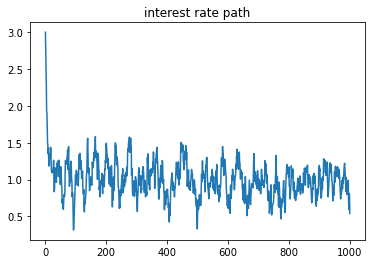

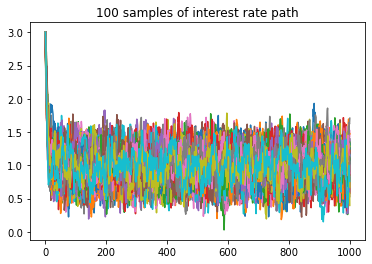

In [112]:
## B ##
# Monte carlo simulation to simulate the path of R(t)

from random import gauss
import numpy as np

alpha = 3
gamma = 1
sigma = 0.5
R_0 = 3
dt = 5/100
simulations = 1000


def generate_interest_rate(alpha,gamma,sigma,R_0,dt,rates):
    dr = ( alpha * ( gamma - rates[-1] ) * dt ) + ( sigma * np.sqrt(dt) * gauss(0,1.0) )
    return dr


def generate_path():
    rates = [R_0]
    for i in range(simulations):
        dr = generate_interest_rate(alpha,gamma,sigma,R_0,dt,rates)
        rates.append(rates[-1] + dr)
    return rates
   
# plot 1  paths
plt.figure()
plt.title('interest rate path')
interest = generate_path()
plt.plot(interest)
plt.show()

# plot 100 paths
paths = 100
plt.figure()
plt.title('100 samples of interest rate path')
for k in range(paths):
    interest = generate_path()
    plt.plot(interest)
plt.show()


In [113]:
## C ##
# Monte carlo simulation to find expectation of Interest rate

from random import gauss
import numpy as np

alpha = 3
gamma = 1
sigma = 0.5
R_0 = 3
dt = 5/100
simulations = 10000


def generate_interest_rate(alpha,gamma,sigma,R_0,dt,rates):
    dr = ( alpha * ( gamma - rates[-1] ) * dt ) + ( sigma * np.sqrt(dt) * gauss(0,1.0) )
    return dr


def generate_path():
    rates = [R_0]
    for i in range(simulations):
        dr = generate_interest_rate(alpha,gamma,sigma,R_0,dt,rates)
        rates.append(rates[-1] + dr)
    return rates

Expectation_R = np.mean(np.array(generate_path()))

print('expected Interest rate:', Expectation_R)

expected Interest rate: 1.0048571030679012
